In [23]:
# Declarando as bibliotecas necessárias.
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [24]:
# Gerando os dados necessários.
X, y = make_blobs(n_samples=150, n_features=2, centers=5, cluster_std=1.0, shuffle=True,
random_state=42)

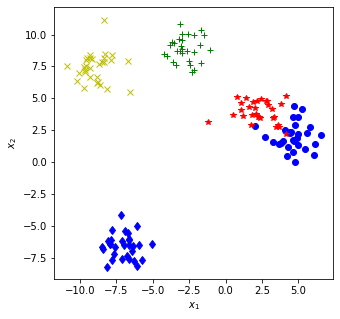

In [25]:
# Plotando os dados de treinamento.
idx0 = np.argwhere(y == 0)
idx1 = np.argwhere(y == 1)
idx2 = np.argwhere(y == 2)
idx3 = np.argwhere(y == 3)
idx4 = np.argwhere(y == 4)

fig = plt.figure(figsize=(5,5))
plt.plot(X[idx0,0], X[idx0,1], 'g+')
plt.plot(X[idx1,0], X[idx1,1], 'bo')
plt.plot(X[idx2,0], X[idx2,1], 'bd')
plt.plot(X[idx3,0], X[idx3,1], 'yx')
plt.plot(X[idx4,0], X[idx4,1], 'r*')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [26]:
# Instanciando um objeto considerando 5 clusters.
km = KMeans(n_clusters=5, random_state=42).fit(X)

In [27]:
# Gerando os centróides.
for i in range(0,5):
    print('Centroid %d: (%1.2f, %1.2f)' % (i,km.cluster_centers_[i][0],km.cluster_centers_[i][1]))

Centroid 0: (-7.02, -6.59)
Centroid 1: (-2.76, 8.82)
Centroid 2: (4.59, 2.07)
Centroid 3: (-8.90, 7.43)
Centroid 4: (2.06, 4.11)


In [28]:
# Determinando o número de interações.
km.n_iter_

3

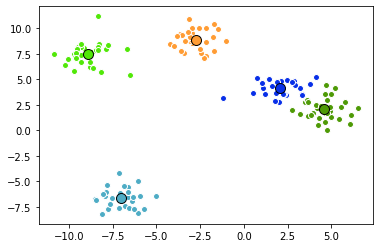

In [29]:
k_means_cluster_centers = km.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

colors = ['#4EACC5', '#FF9C34', '#4E9A06','#51e808', '#082fe8',]

for k, col in zip(range(5), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], 'w',
            markerfacecolor=col, marker='o', markersize = 6)
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=10)